<a href="https://colab.research.google.com/github/snackoverflovv/bigdata_contest/blob/main/%EB%B9%85%EB%B6%84%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 지역별·부대별 기상/훈련 데이터 비교

“똑같이 WBGT 28이라도 철원과 해안부대의 실제 체감 환경은 다르다”

→ “전군 동일 기준은 한계가 있다”라는 문제 인식 제시.

*산악 지역(철원) vs 해안지역(고성) vs
내륙지역(춘천)*

(북위 38°~북위 39°에 맞춰 지역 선정)

https://url.kr/hxysgv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ccg_wbgt.csv')

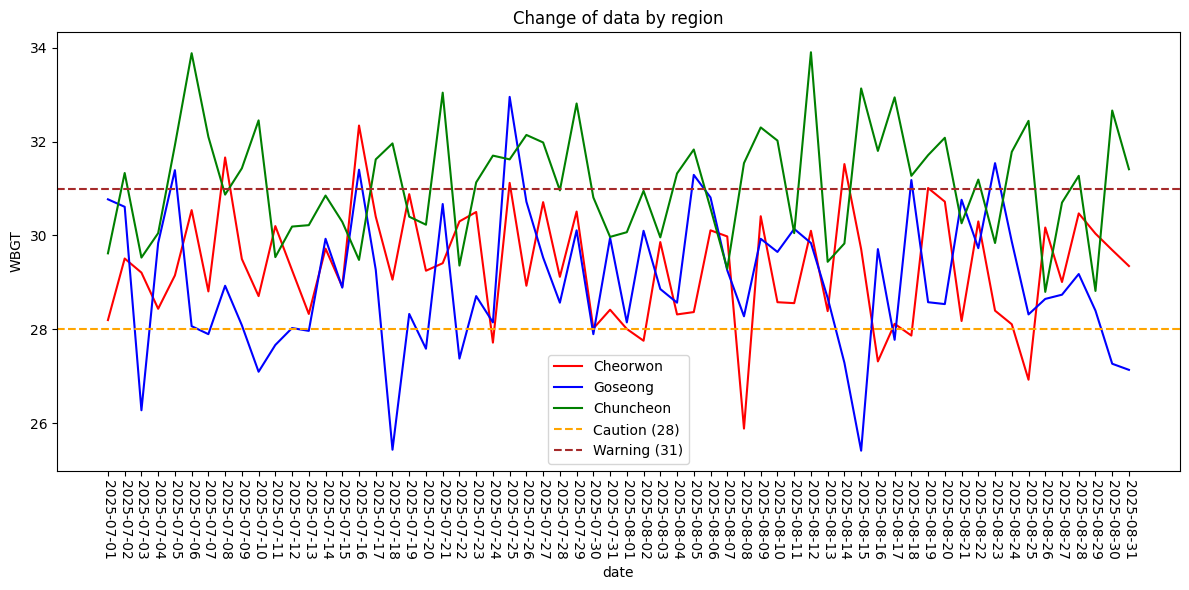

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["Cheorwon"], label="Cheorwon", color="red")
plt.plot(df["date"], df["Goseong"], label="Goseong", color="blue")
plt.plot(df["date"], df["Chuncheon"], label="Chuncheon", color="green")
plt.axhline(28, color="orange", linestyle="--", label="Caution (28)")
plt.axhline(31, color="brown", linestyle="--", label="Warning (31)")
plt.legend()
plt.title("Change of data by region")
plt.xlabel("date")
plt.ylabel("WBGT")
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

## 2. WBGT vs 실제 위험도 예측력 검증

WBGT 단독 기준으로는 사고를 다 설명 못 한다

→ 따라서 기상+훈련강도+지역 특성을 함께 반영해야 한다 라는 필요성 강조.


위험도 같은 경우는 논문 공식 따라서 할 예정인데, 이게 어느정도 수치를 주는건지 예시가 없는듯함.

## 3. AI 위험성 평가 모델 제작 제안

육군 위험성평가체계(ARAS,
Army Risk Assessment System)
가 존재해서 여기에 추가하면 좋겠다고 하면 될 듯.
